In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 0.3],
    [1.9, 2.2, 1.1],
    [3.1, 3.0, 1.7],
    [2.3, 2.7, 1.5],
    [2.0, 1.6, 0.9],
    [1.0, 1.1, 0.4],
    [1.5, 1.6, 0.8],
    [1.1, 0.9, 0.2]
])
df = pd.DataFrame(data, columns=["X", "Y", "Z"])

In [ ]:
standardized_data = (df - df.mean()) / df.std()

In [ ]:
cov_matrix = np.cov(standardized_data.T)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [ ]:
eig_vecs_subset = eigenvectors[:, :2]

In [ ]:
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])

In [ ]:
print("\nReduced Data (after PCA):\n", reduced_df)


Reduced Data (after PCA):
         PC1       PC2
0  1.235127  0.047570
1 -2.389138  0.310317
2  0.422946 -1.565537
3  0.534622  0.179863
4  2.620166  0.257411
5  1.594892  0.354889
6 -0.004677  0.246117
7 -1.628526  0.072043
8 -0.491438  0.221710
9 -1.893975 -0.124383


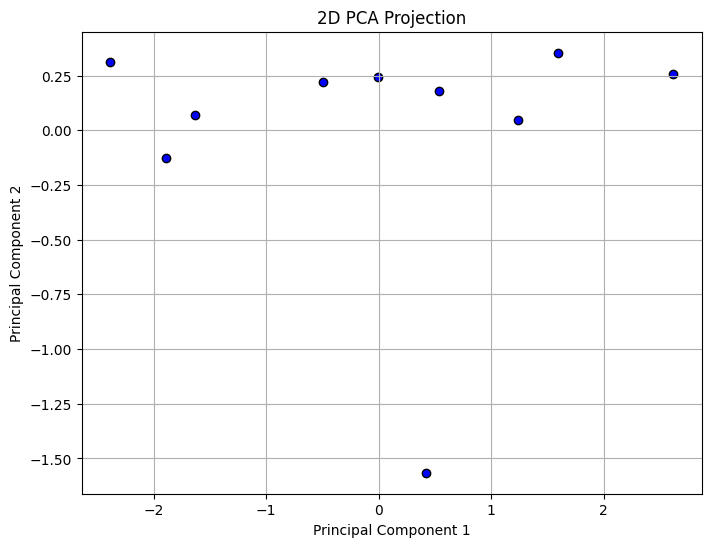

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df["PC1"], reduced_df["PC2"], color='blue', edgecolor='k')
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()